`EMAIL SPAM DETECTION USING MACHINE LEARNING`

- In this Project, use Python to build an email spam detector.
- Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv(r'spam.csv', encoding = 'Latin')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# removing unwanted columns
df = df.drop(columns = {'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'})

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Changing the column names 
df = df.rename(columns = {'v1': 'outcome', 'v2' : 'message'})

In [8]:
df.head()

,outcome,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`DATA CLEANING`

In [9]:
# Apply Lable encoder for the target column title 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 

df['outcome'] = encoder.fit_transform(df['outcome']) 
df.head()

,outcome,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- ham : 0
- spam : 1

In [10]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  5572 non-null   int32 
 1   message  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [11]:
# check null values 
df.isna().sum()

outcome    0
message    0
dtype: int64

In [12]:
# check duplicate values 
df.duplicated().sum()

403

In [13]:
# drop duplictaes 
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(5169, 2)

`Exploratory data analysis`

In [15]:
# Checking the target 
df.outcome.value_counts()

outcome
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24b9a3574d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

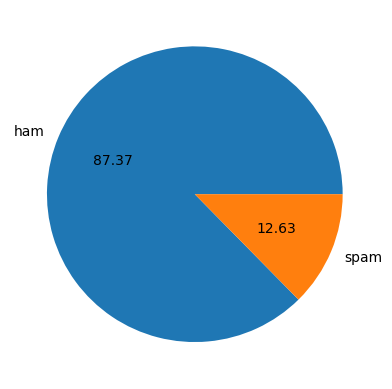

In [16]:
plt.pie(df['outcome'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

`Observation`: Data is imbalanced

`Data preprocessing`

In [17]:
import nltk 

In [18]:
df['no_of_char'] = df['message'].apply(len)
df.head()

,outcome,message,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
### Sentence tokenization 
df['No_of_sentence'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,outcome,message,no_of_char,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [20]:
### work tokenization 
df['No_of_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x))) 
df.head()

,outcome,message,no_of_char,No_of_sentence,No_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [21]:
### Statistical analysis 
df.describe()

,outcome,no_of_char,No_of_sentence,No_of_words
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,1.965564,18.455794
std,0.332253,58.236293,1.448541,13.324758
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,1.000000,9.000000
50%,0.000000,60.000000,1.000000,15.000000
75%,0.000000,117.000000,2.000000,26.000000
max,1.000000,910.000000,38.000000,220.000000


In [22]:
### Statistical analysis for ham category 
df[df['outcome'] == 0][['no_of_char',	'No_of_sentence', 'No_of_words']].describe()

,no_of_char,No_of_sentence,No_of_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,17.123782
std,56.358207,1.383657,13.493970
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [23]:
### Statistical analysis for spam category 
df[df['outcome'] == 1][['no_of_char',	'No_of_sentence', 'No_of_words']].describe()

,no_of_char,No_of_sentence,No_of_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


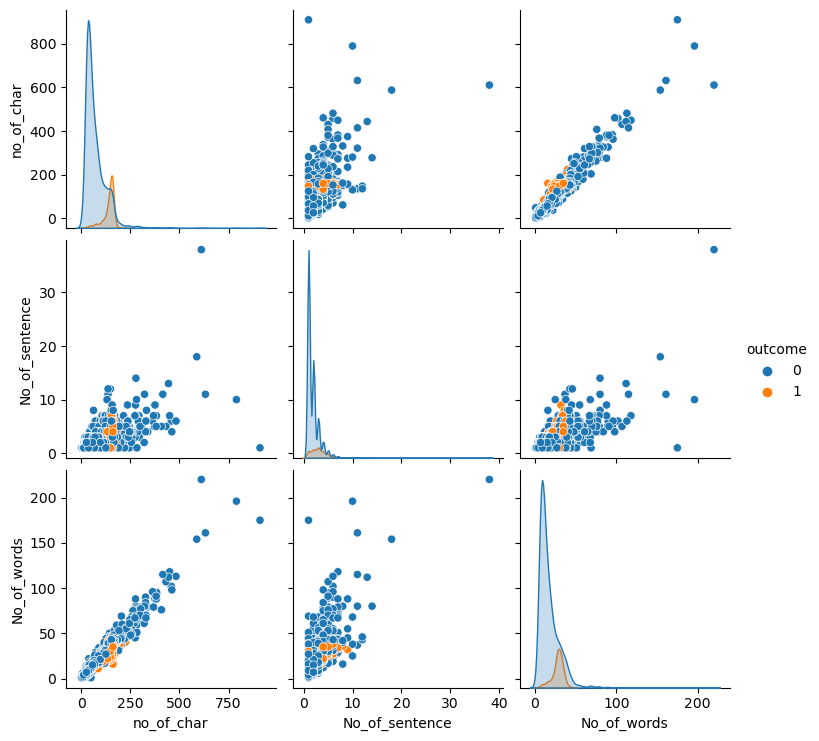

In [24]:
sns.pairplot(df, hue='outcome')

In [25]:
# stop words 
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [26]:
# stemming & Lemmatization  
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [27]:
def transform_message(text):  
    # convert to lowercase 
    text = text.lower()  

    # word tokenization
    text = nltk.word_tokenize(text) 

    # To handle punctuations
    y = [] 
    for i in text: 
        if i.isalnum(): 
            y.append(i) 
    text = y[:]  
    y.clear() 

    # To remove stop words 
    for i in text: 
        if i not in stop_words: 
            y.append(i) 
    text = y[:] 
    y.clear()

    # stemming 
    for i in text: 
        y.append(ps.stem(i)) 
        
    return " ".join(y)

In [28]:
transform_message("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [29]:
df['Transformed_message'] = df['message'].apply(transform_message) 
df.head()

,outcome,message,no_of_char,No_of_sentence,No_of_words,Transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [30]:
## BOW, Text vectorization 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
x = tfidf.fit_transform(df['Transformed_message']).toarray()

In [32]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
x.shape

(5169, 3000)

In [34]:
y = df['outcome'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
## Train test split 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42) 

In [36]:
x_train.shape, x_test.shape

((4135, 3000), (1034, 3000))

In [37]:
# develop the model 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression() 

In [38]:
model.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9584139264990329

In [40]:
confusion_matrix(y_test, y_pred)

array([[883,   6],
       [ 37, 108]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       889
           1       0.95      0.74      0.83       145

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [45]:
# Predictive model
input_data = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."] 

input_features = tfidf.transform(input_data) 

# No need to reshape since it's already in the correct format
predictor = model.predict(input_features)

print(predictor)

if predictor==0: 
    print('This is a ham message')
else: 
    print('This is a spam message')

[0]
This is a ham message
